In [1]:
import numpy as np
import pandas as pd

In [2]:
cctv_seoul = pd.read_csv('data/서울시 CCTV 설치운영 현황(자치구)-연도별.csv', 
                         header = 1, thousands = ',', encoding='cp949')
cctv_seoul.head()

#header = 1 : 원래 데이터에서 몇 줄을 빼고 가져올까요? header = 1 -- 한 줄.
#thousands = ',' : 원 데이터에 1000단위 데이터가 들어있음을 알려주고
# encoding 이 cp949 (유니코드로 인코딩해줘)

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [3]:
## 실제 데이터가 무엇이 들어있을까.
cctv_seoul.info()

# 값이 널이 없다는 뜻이고 0 to 25줄의 라인이 있다 - 라는 사실을 알 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        26 non-null     object
 1   총계        26 non-null     int64 
 2   2011년 이전  26 non-null     int64 
 3   2011년     26 non-null     int64 
 4   2012년     26 non-null     int64 
 5   2013년     26 non-null     int64 
 6   2014년     26 non-null     int64 
 7   2015년     26 non-null     int64 
 8   2016년     26 non-null     int64 
 9   2017년     26 non-null     int64 
 10  2018년     26 non-null     int64 
 11  2019년     26 non-null     int64 
 12  2020년     26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.8+ KB


In [4]:
cctv_seoul.reset_index(drop=True, inplace=True)

In [5]:
#필요 없는 줄은 제외하고 출력해보자.
cctv_seoul.drop([0], inplace = True)
cctv_seoul.head()
# index 0번째 줄을 drop 할껀데 drop은 날리는 데이터를 리턴하기 때문에 정확히 상태에 대해 지정해줘야한다.
# inplace = True 를 통해 명확히 상태를 지정한다

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [6]:
print(cctv_seoul.index)

RangeIndex(start=1, stop=26, step=1)


In [7]:
cctv_seoul.rename(columns = {cctv_seoul.columns[0]:'구별'}, inplace = True)
cctv_seoul.head()
## 컬럼명을 바꿔보자

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [8]:
# pop_seoul = pd.read_csv('data/population.txt', header = 2, delim_whitespace = True,
                        # thousands = ',')

#C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18456\990833275.py:1: 
#FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated 
#and will be removed in a future version. Use ``sep='\s+'`` instead
#pop_seoul = pd.read_csv('data/population.txt', header = 2, delim_whitespace = True,
# 이 에러가 뜨는 이유는 버전 업 문제 때문에 정규식을 쓰라는 의미.

#수정한 코드.
pop_seoul = pd.read_csv('data/population.txt', header = 2, sep = '\s+',
                        thousands = ',')
pop_seoul.head()

# 데이터 안에 순수 1000단위의 , 밖에 없다.



,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.1/4,합계,4400403,9828094,4774856,5053238,9598484,4667524,4930960,229610,107332,122278,2.18,1567819
1,2021.1/4,종로구,74113,156567,75772,80795,147296,71644,75652,9271,4128,5143,1.99,27781
2,2021.1/4,중구,63746,133708,65312,68396,124552,60851,63701,9156,4461,4695,1.95,24767
3,2021.1/4,용산구,112881,243336,118120,125216,229013,110181,118832,14323,7939,6384,2.03,39575
4,2021.1/4,성동구,135883,298421,145358,153063,291906,142506,149400,6515,2852,3663,2.15,45968


In [9]:
# 필요 없는 칼럼 삭제하기

#axis = 행
pop_seoul.drop(['기간', '세대', '남자', '여자', '남자.1', '여자.1', '남자.2', '여자.2', '세대당인구'],
               axis = 1, inplace = True)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9828094,9598484,229610,1567819
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968


In [14]:
pop_seoul.rename(columns = {pop_seoul.columns[0]: '구별',
                           pop_seoul.columns[1]: '인구수',
                           pop_seoul.columns[2]: '한국인',
                           pop_seoul.columns[3]: '외국인',
                           pop_seoul.columns[4]: '고령자'}, inplace = True)
pop_seoul.head()
                           

,구별,인구수,한국인,외국인,고령자
0,합계,9828094,9598484,229610,1567819
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968


In [15]:
pop_seoul.drop([0], inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968
5,광진구,356191,343392,12799,50370


In [16]:
cctv_seoul['구별'].unique()

array(['종로구', '중 구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [18]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [19]:
cctv_seoul.loc[cctv_seoul['구별'] == '중 구', '구별'] = '중구'
# cctv_seoul.loc[1,0] = '중구'
cctv_seoul['구별'].unique()


array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [20]:
cctv_seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [21]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        25 non-null     object
 1   총계        25 non-null     int64 
 2   2011년 이전  25 non-null     int64 
 3   2011년     25 non-null     int64 
 4   2012년     25 non-null     int64 
 5   2013년     25 non-null     int64 
 6   2014년     25 non-null     int64 
 7   2015년     25 non-null     int64 
 8   2016년     25 non-null     int64 
 9   2017년     25 non-null     int64 
 10  2018년     25 non-null     int64 
 11  2019년     25 non-null     int64 
 12  2020년     25 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.7+ KB


In [23]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     25 non-null     int64 
 2   한국인     25 non-null     int64 
 3   외국인     25 non-null     int64 
 4   고령자     25 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [24]:
# 총계를 기준으로 오름차순으로 sorting 하겠다.
cctv_seoul.sort_values(by = '총계', ascending = True)

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
10,도봉구,1356,0,49,29,96,181,79,159,134,223,214,192
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130
20,동작구,2262,165,73,93,29,503,130,254,278,255,242,240
11,노원구,2282,0,0,90,105,109,605,405,256,201,240,271
6,동대문구,2315,960,130,146,60,29,111,233,136,197,209,104
18,금천구,2365,0,0,0,178,80,361,133,196,540,369,508
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
14,마포구,2401,270,66,93,77,61,162,350,358,340,384,240
16,강서구,2437,26,29,129,106,213,188,168,506,259,457,356


In [25]:
# 그 반대로 sorting
cctv_seoul.sort_values(by = '총계', ascending = False)

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931
21,관악구,4909,320,120,84,431,441,608,620,684,674,596,331
17,구로구,4075,643,209,216,349,187,268,326,540,488,434,415
19,영등포구,3773,450,122,136,238,123,209,248,311,658,65,1213
8,성북구,3754,42,41,87,174,230,323,587,461,860,716,233
22,서초구,3730,0,117,72,93,71,563,516,1061,436,361,440
12,은평구,3660,14,0,3,44,332,329,555,403,635,1057,288
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
15,양천구,3307,1217,282,175,201,173,193,351,120,142,255,198
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930


# 최근 5년간 cctv 증가율을 알아보자.
\ 역슬레쉬는 파이썬에서 끊긴 문장을 이어준다

In [29]:
cctv_seoul['최근증가율'] = (cctv_seoul ['2016년'] + cctv_seoul ['2017년'] +
                            cctv_seoul ['2018년'] + cctv_seoul ['2019년'] +
                            cctv_seoul ['2020년'])/ \
                           (cctv_seoul ['2011년 이전'] + cctv_seoul ['2011년'] +
                            cctv_seoul ['2012년'] + cctv_seoul ['2013년'] +
                            cctv_seoul ['2014년'] + cctv_seoul ['2015년']) * 100

cctv_seoul.sort_values(by = '총계', ascending = False)

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931,256.682770
21,관악구,4909,320,120,84,431,441,608,620,684,674,596,331,144.960080
17,구로구,4075,643,209,216,349,187,268,326,540,488,434,415,117.681624
19,영등포구,3773,450,122,136,238,123,209,248,311,658,65,1213,195.226917
8,성북구,3754,42,41,87,174,230,323,587,461,860,716,233,318.506132
22,서초구,3730,0,117,72,93,71,563,516,1061,436,361,440,307.205240
12,은평구,3660,14,0,3,44,332,329,555,403,635,1057,288,406.925208
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456,172.692009
15,양천구,3307,1217,282,175,201,173,193,351,120,142,255,198,47.568050
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930,300.121803


In [30]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968
5,광진구,356191,343392,12799,50370


한국인과 외국인을 더하면 전체 인구가 되는 것을 알 수 있다.

In [37]:
# 외국인비율과 고령자비율을 알아보자.
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,156567,147296,9271,27781,5.921427,17.743841
2,중구,133708,124552,9156,24767,6.847758,18.523200
3,용산구,243336,229013,14323,39575,5.886100,16.263520
4,성동구,298421,291906,6515,45968,2.183157,15.403742
5,광진구,356191,343392,12799,50370,3.593297,14.141289


In [38]:
#내림차순으로 sorting
pop_seoul.sort_values(by='인구수', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667115,661411,5704,94145,0.855025,14.112260
16,강서구,582804,577320,5484,89377,0.940968,15.335687
23,강남구,539538,534796,4742,75602,0.878900,14.012359
11,노원구,522225,518278,3947,85906,0.755804,16.449998
21,관악구,504140,490352,13788,78400,2.734955,15.551236
12,은평구,479607,475501,4106,85140,0.856118,17.752034
25,강동구,468815,464900,3915,71203,0.835084,15.187867
15,양천구,456019,452677,3342,66231,0.732864,14.523737
8,성북구,444295,434826,9469,73158,2.131242,16.466087
17,구로구,426675,401074,25601,70717,6.000117,16.573973


In [39]:
#서울에서 외국인이 가장 많은 곳
pop_seoul.sort_values(by= '외국인', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,426675,401074,25601,70717,6.000117,16.573973
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
3,용산구,243336,229013,14323,39575,5.886100,16.263520
21,관악구,504140,490352,13788,78400,2.734955,15.551236
6,동대문구,352570,338875,13695,60868,3.884335,17.264089
5,광진구,356191,343392,12799,50370,3.593297,14.141289
13,서대문구,318814,308482,10332,53440,3.240761,16.762125
14,마포구,378216,368518,9698,53494,2.564143,14.143770
20,동작구,398205,388730,9475,65396,2.379428,16.422697


In [40]:
# 외국인 비율을 보자면
pop_seoul.sort_values(by= '외국인비율', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133708,124552,9156,24767,6.847758,18.523200
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
17,구로구,426675,401074,25601,70717,6.000117,16.573973
1,종로구,156567,147296,9271,27781,5.921427,17.743841
3,용산구,243336,229013,14323,39575,5.886100,16.263520
6,동대문구,352570,338875,13695,60868,3.884335,17.264089
5,광진구,356191,343392,12799,50370,3.593297,14.141289
13,서대문구,318814,308482,10332,53440,3.240761,16.762125
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [41]:
pop_seoul.sort_values(by= '고령자', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667115,661411,5704,94145,0.855025,14.112260
16,강서구,582804,577320,5484,89377,0.940968,15.335687
11,노원구,522225,518278,3947,85906,0.755804,16.449998
12,은평구,479607,475501,4106,85140,0.856118,17.752034
21,관악구,504140,490352,13788,78400,2.734955,15.551236
23,강남구,539538,534796,4742,75602,0.878900,14.012359
8,성북구,444295,434826,9469,73158,2.131242,16.466087
25,강동구,468815,464900,3915,71203,0.835084,15.187867
17,구로구,426675,401074,25601,70717,6.000117,16.573973
7,중랑구,396807,392041,4766,69841,1.201088,17.600748


In [42]:
pop_seoul.sort_values(by= '고령자비율', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,307537,304078,3459,62893,1.124743,20.450547
10,도봉구,323752,321717,2035,62360,0.628568,19.261657
2,중구,133708,124552,9156,24767,6.847758,18.523200
12,은평구,479607,475501,4106,85140,0.856118,17.752034
1,종로구,156567,147296,9271,27781,5.921427,17.743841
7,중랑구,396807,392041,4766,69841,1.201088,17.600748
6,동대문구,352570,338875,13695,60868,3.884335,17.264089
13,서대문구,318814,308482,10332,53440,3.240761,16.762125
17,구로구,426675,401074,25601,70717,6.000117,16.573973
8,성북구,444295,434826,9469,73158,2.131242,16.466087


# 인구수와 cctv데이터를 합치는 과정을 알아보자.

In [43]:
# 구별 이름으로 붙여보자.
data_result = pd.merge(cctv_seoul, pop_seoul, on = '구별')
data_result.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,216,7,10,582,210,150,1,259,85,9,200,47.148936,156567,147296,9271,27781,5.921427,17.743841
1,중구,2001,16,6,199,90,125,218,333,462,228,194,130,205.963303,133708,124552,9156,24767,6.847758,18.523200
2,용산구,2383,31,3,71,234,125,221,298,351,125,307,617,247.883212,243336,229013,14323,39575,5.886100,16.263520
3,성동구,3515,487,26,122,207,112,335,309,790,409,262,456,172.692009,298421,291906,6515,45968,2.183157,15.403742
4,광진구,2556,11,24,57,100,187,98,52,675,465,712,175,435.849057,356191,343392,12799,50370,3.593297,14.141289


In [45]:
data_result.drop(['2011년 이전', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년' 
                  ,'2018년', '2017년', '2019년', '2020년'],
                 axis = 1, inplace = True)
data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,47.148936,156567,147296,9271,27781,5.921427,17.743841
1,중구,2001,205.963303,133708,124552,9156,24767,6.847758,18.523200
2,용산구,2383,247.883212,243336,229013,14323,39575,5.886100,16.263520
3,성동구,3515,172.692009,298421,291906,6515,45968,2.183157,15.403742
4,광진구,2556,435.849057,356191,343392,12799,50370,3.593297,14.141289


In [46]:
data_result.set_index('구별', inplace = True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1729,47.148936,156567,147296,9271,27781,5.921427,17.743841
중구,2001,205.963303,133708,124552,9156,24767,6.847758,18.523200
용산구,2383,247.883212,243336,229013,14323,39575,5.886100,16.263520
성동구,3515,172.692009,298421,291906,6515,45968,2.183157,15.403742
광진구,2556,435.849057,356191,343392,12799,50370,3.593297,14.141289


# 각 자치구에 설치되어있는 cctv의 갯수는 어떤 칼럼과 연관이 있을까?

In [ ]:
# 지금까지 가공한 데이터를 미리 csv 파일로 저장해놓기.
data_result.to_csv('data/cctv_pop_seoul.csv', sep = ',', encoding = 'utf-8')

In [48]:
#상관계수 0.3이상이면 어느정도 상관이 있다. 0.7 이상은 아주 상관이 있다.
# 그렇다면 둘의 상관관계가 있겠니? - np.corrcoef / 상관관계를 알아보는 과정.

# 고령자가 많을수록 cctv가 많을까?
np.corrcoef(data_result['고령자비율'], data_result['총계'])

array([[ 1.        , -0.42943277],
       [-0.42943277,  1.        ]])

In [49]:
# 외국인이 많을수록 cctv가 많을까?
np.corrcoef(data_result['외국인비율'], data_result['총계'])

array([[ 1.       , -0.1694645],
       [-0.1694645,  1.       ]])

In [51]:
# 인구수가 많을수록 cctv가 많을까?
np.corrcoef(data_result['인구수'], data_result['총계'])

# 인구가 많으면 많을수록 cctv를 많이 달고있다.

array([[1.        , 0.45645369],
       [0.45645369, 1.        ]])

데이터 가공 후 그래프를 그리기 위해 seaborn과 matplotlib를 import한다.

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

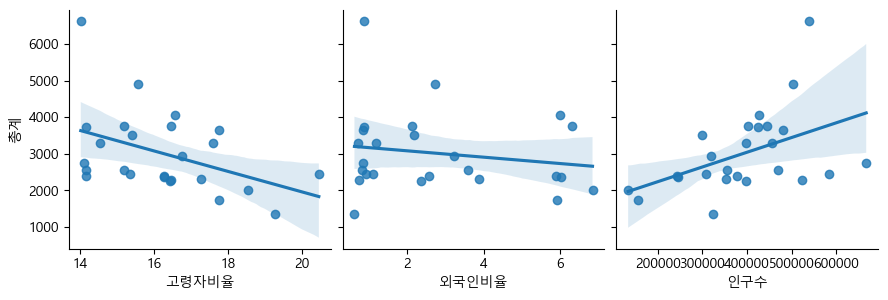

In [56]:
sns.pairplot(data_result, x_vars = ['고령자비율', '외국인비율', '인구수'],
             y_vars = ['총계'], kind = 'reg', height = 3) #height / inch

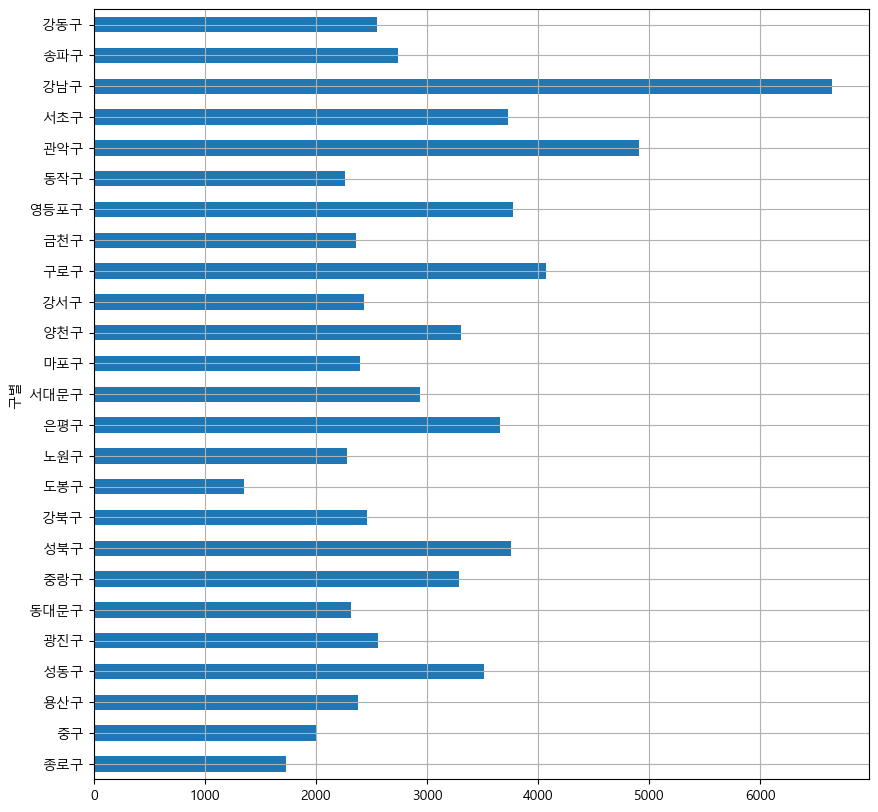

In [59]:
#전체 cctv 갯수를 세로 막대 그래프로 그리기
data_result['총계'].plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

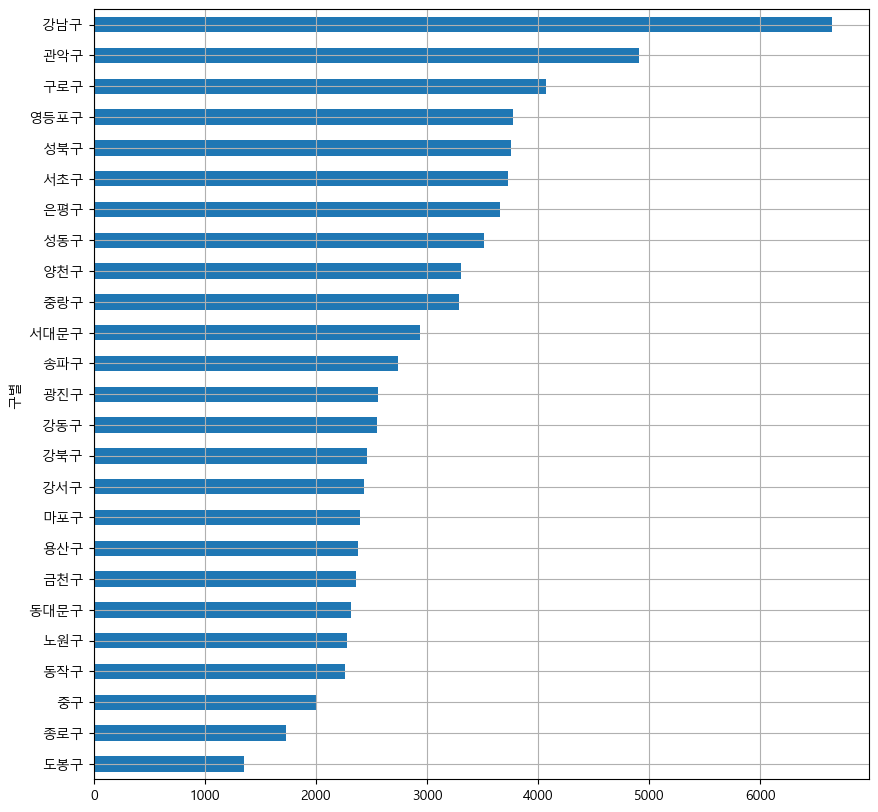

In [66]:
# 오름차순으로 한다면
data_result['총계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

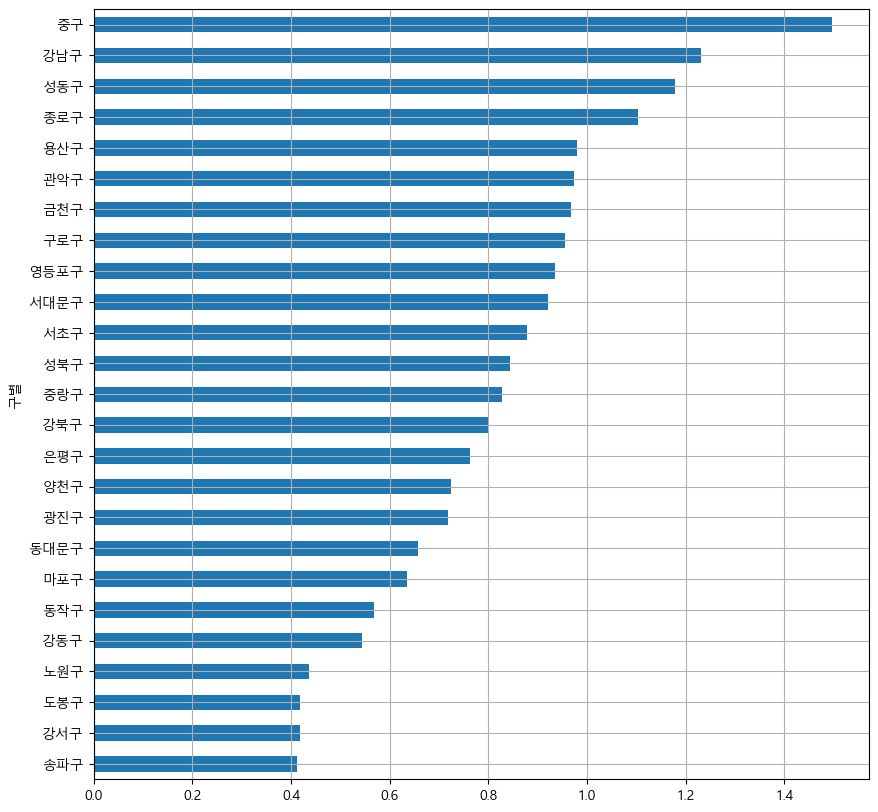

In [69]:
# cctv가 어디에 인구수 비레 어디에 젤 많이 설치되어있나

data_result['cctv비율'] = data_result['총계'] / data_result['인구수'] * 100
data_result['cctv비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

Text(0, 0.5, 'cctv')

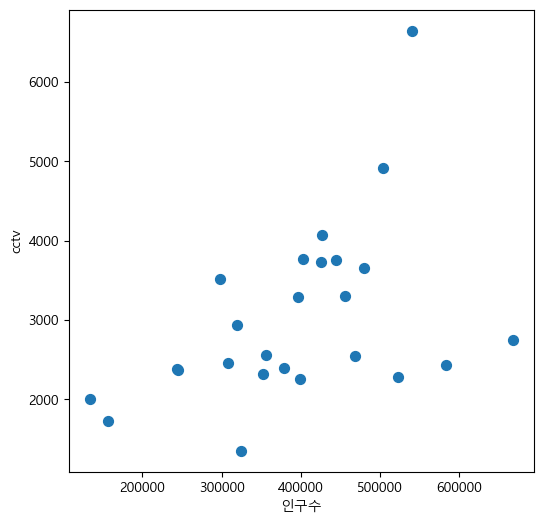

In [70]:
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['총계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('cctv')

In [73]:
# 위 그래프의 직선을 구해보자
# y = ax+b 형태일 것.

#1차 함수를 구해라.
fp = np.polyfit(data_result['인구수'], data_result['총계'], 1)

# a= 4.03056886e-03 , b = 1.43272762e+03

array([4.03056886e-03, 1.43272762e+03])

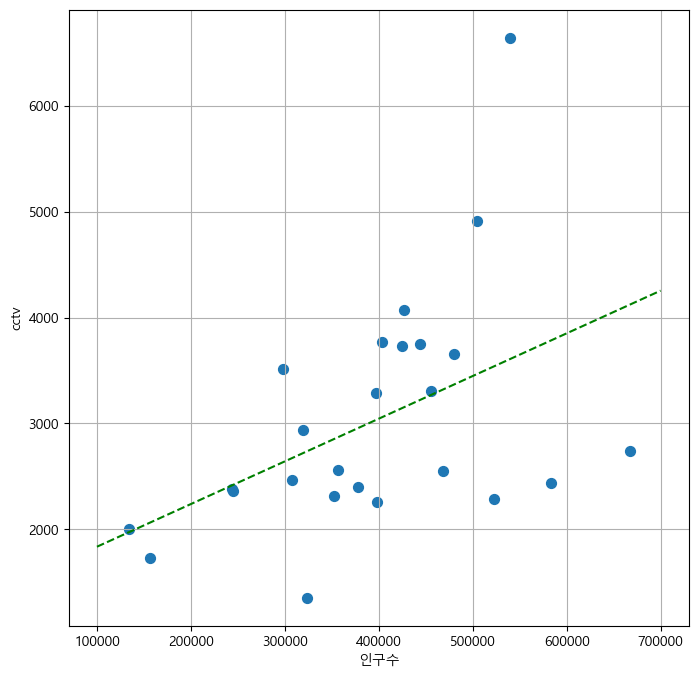

In [75]:
f1 = np.poly1d(fp)
fx = np.linspace(100000, 700000, 100)
#10만 부터 70만 사이를 100등분 한다.

#그래프 그리기
plt.figure(figsize = (8,8))
plt.scatter(data_result['인구수'], data_result['총계'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', color = 'g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [80]:
#직선을 기준으로 위아래를 나눠 오차를 알 수 있다.
data_result['오차'] = np.abs(data_result['총계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by = '오차', ascending = False)
df_sort.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,6645,256.682770,539538,534796,4742,75602,0.878900,14.012359,1.231609,3037.627324
관악구,4909,144.960080,504140,490352,13788,78400,2.734955,15.551236,0.973737,1444.301400
도봉구,1356,212.442396,323752,321717,2035,62360,0.628568,19.261657,0.418839,1381.632345
송파구,2743,427.500000,667115,661411,5704,94145,0.855025,14.112260,0.411173,1378.580559
강서구,2437,252.677279,582804,577320,5484,89377,0.940968,15.335687,0.418151,1344.759268


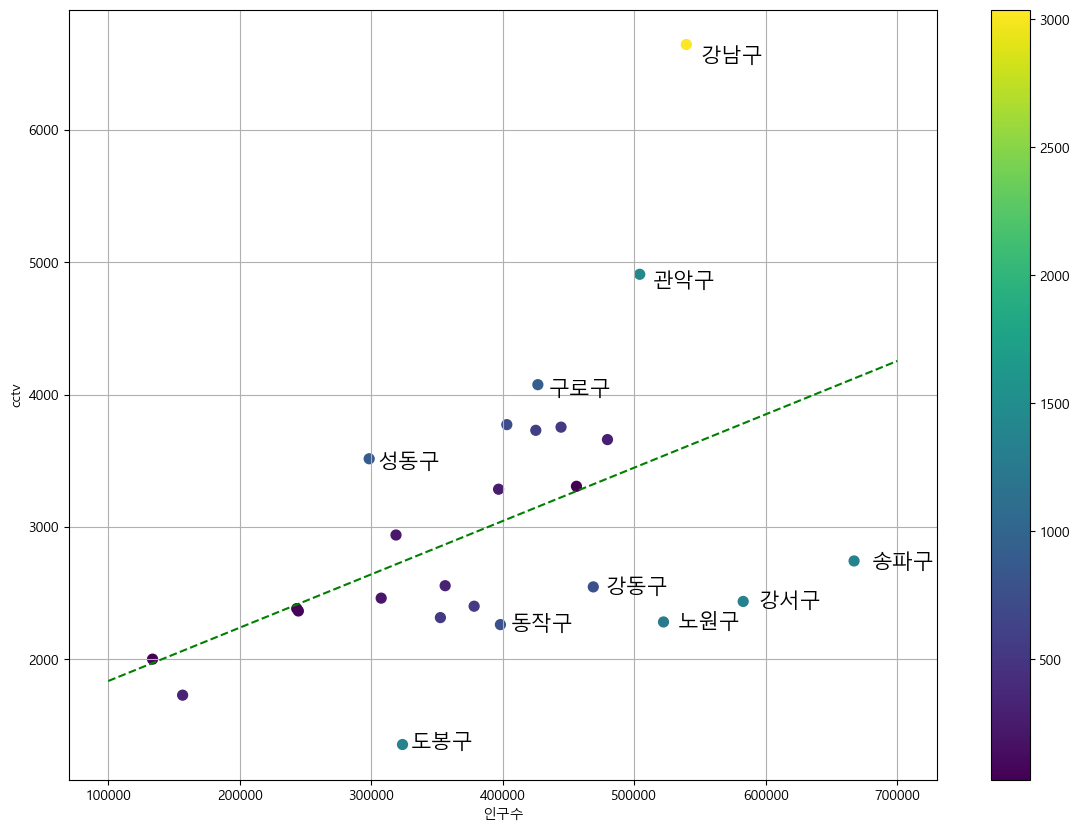

In [83]:
#상위 10개에 대해 알아보자.
plt.figure(figsize=(14,10)) # 그래프사이즈
plt.scatter(data_result['인구수'], data_result['총계'], c=data_result['오차'], s=50) 
#각 값을 컬러를 다르게 준다. 알아서 서로 다른 컬러 제공.
plt.plot(fx, f1(fx), ls='dashed', color='g')
#직선 컬러는 g(green)


for n in range(10): 
    plt.text(df_sort['인구수'][n]*1.02, df_sort['총계'][n]*0.98, df_sort.index[n], fontsize=15)
## 이 구문은 경고가 뜬다
# In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior): 
# 앞으로의 버전에서는 Series에서 숫자 인덱스가 항상 레이블(label)로 해석될 것이라고 경고하고 있습니다.
# To access a value by position, use ser.iloc[pos]: 
#위치 기반 접근을 원하면 ser.iloc[pos]를 사용해야 한다고 권장하고 있습니다.

#수정된 코드
for n in range(10): # 0~9까지 일 때,
    plt.text(df_sort['인구수'].iloc[n]*1.02, df_sort['총계'].iloc[n]*0.98, df_sort.index[n], fontsize=15)
        #인구수의 0번 인덱스(강남구) = x(x값 약간 크게), 총계를 y(y값은 약간 작게)로 하고 폰트값은 15로 한다.
    #크기 조정 안해주면 겹쳐서 덮어버리기 때문에 조정해준 것.
    #text는 x와 y의 좌표값을 주면 글자를 찍는 함수.

plt.xlabel('인구수')
plt.ylabel('cctv')
plt.colorbar()
plt.grid()
plt.show()

In [84]:
import folium
import json

In [ ]:
#서울시 자치구를 folium으로 표현해보자

In [85]:
geo_path = 'data/seoul_geo.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [87]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11)

folium.Choropleth(geo_data = geo_str,
                 data = data_result['cctv비율']
                 ,columns = [data_result.index, data_result['cctv비율']]
                 ,fill_color = 'PuRd'
                 ,key_on = 'feature.id').add_to(map) #id를 키값으로 주겠다.
map

# 색깔이 진할수록 cctv가 많다는 것이고, 연할수록 없다는 것이다.
# color는 PuRd에서 가져온 것. 
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

#지도는 누구나 사용할 수 있는 오픈 api로 시각화 할 때 유용하다.